# Modern Portfolio Theory (Mean-Variance Analysis)

The following **JupyterLab** extension must be installed before running this code:

`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Additionally, the following libraries are needed:

* Pandas
* NumPy
* SciPy

> **Note**: Although only two assets are used in this notebook, the implemented function can process a number of assets greater than two. All output weights are within the range [0, 1]

In [2]:
#from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import mpt

%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2

## **Example 1**: Historical Data

In [3]:
data1 = pd.DataFrame({"Asset A": [0.01, 0.02, 0.03, 0.04], "Asset B": [0.05, 0.06, 0.05, 0.04]})
data1.index = ["1st quarter","2nd quarter","3rd quarter","4th quarter"]
data1

,Asset A,Asset B
1st quarter,0.01,0.05
2nd quarter,0.02,0.06
3rd quarter,0.03,0.05
4th quarter,0.04,0.04


In [4]:
er1 = (1+data1).prod()**(data1.shape[0]/12)-1
er1

Asset A    0.033389
Asset B    0.067184
dtype: float64

In [5]:
cov1 = data1.cov()
cov1

,Asset A,Asset B
Asset A,0.000167,-0.000067
Asset B,-0.000067,0.000067


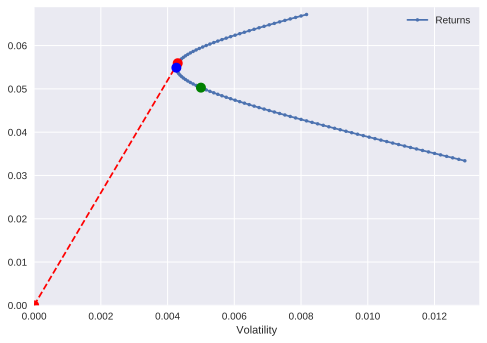

In [6]:
mpt.efficient_frontier(er1, cov1)

## **Example 2**: Calculated Parameters

In [7]:
er2 = pd.Series({"Asset A": 0.1, "Asset B": 0.2})
er2

Asset A    0.1
Asset B    0.2
dtype: float64

In [8]:
vol2 = pd.Series({"Asset A": 0.15, "Asset B": 0.3})
corr2 = -0.5
cov2 = np.array([[vol2[0]**2,corr2*vol2[0]*vol2[1]],[corr2*vol2[0]*vol2[1],vol2[1]**2]])
cov2

array([[ 0.0225, -0.0225],
       [-0.0225,  0.09  ]])

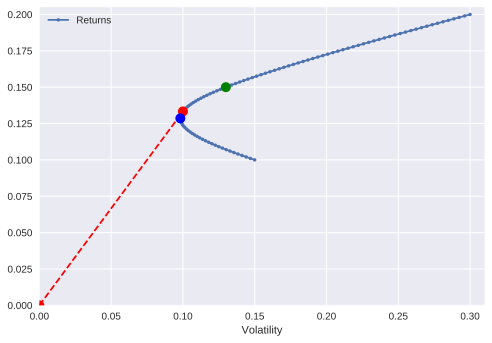

In [9]:
mpt.efficient_frontier(er2, cov2)

## **Example 3**: Interactive Dashboard

In [10]:
def efficient_frontier_interactive(erA, erB, volA, volB, corr, n_points, show_cml, show_ew, show_gmv, riskfree_rate):
    er = np.array([erA, erB])
    cov = np.array([[volA**2,corr*volA*volB],[corr*volA*volB,volB**2]])
    mpt.efficient_frontier(er, cov, n_points, riskfree_rate, show_cml, show_ew, show_gmv, style='.-')

data_buttons = [widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=0.1, description="Return A"),
                widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=0.15, description="Volatility A"),
                widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=0.2, description="Return B"),
                widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=0.3, description="Volatility B"),
                widgets.FloatSlider(min=-1, max=1, step=0.01, value=0, description="Correlation"),
                widgets.FloatSlider(min=0, max=0.1, step=0.01, value=0.01, description="Risk-free")]
portfolio_buttons = [widgets.ToggleButton(value=True, description=p) for p in ['CML', 'EW', 'GMV']]
n_points_slider = widgets.IntSlider(min=10, max=500, step=1, value=100, description="Points")

ui = widgets.VBox([widgets.HBox([widgets.VBox(data_buttons[0:2]),
                                 widgets.VBox(data_buttons[2:4]),
                                 widgets.VBox(data_buttons[4:6])]),
                   widgets.HBox(portfolio_buttons),
                   n_points_slider])
    
out = widgets.interactive_output(efficient_frontier_interactive,{'erA': data_buttons[0],
                                                      'erB': data_buttons[2],
                                                      'volA': data_buttons[1],
                                                      'volB': data_buttons[3],
                                                      'corr': data_buttons[4],
                                                      'n_points': n_points_slider,
                                                      'show_cml': portfolio_buttons[0],
                                                      'show_ew': portfolio_buttons[1],
                                                      'show_gmv': portfolio_buttons[2],
                                                      'riskfree_rate': data_buttons[5]})

display(ui, out)

Output()